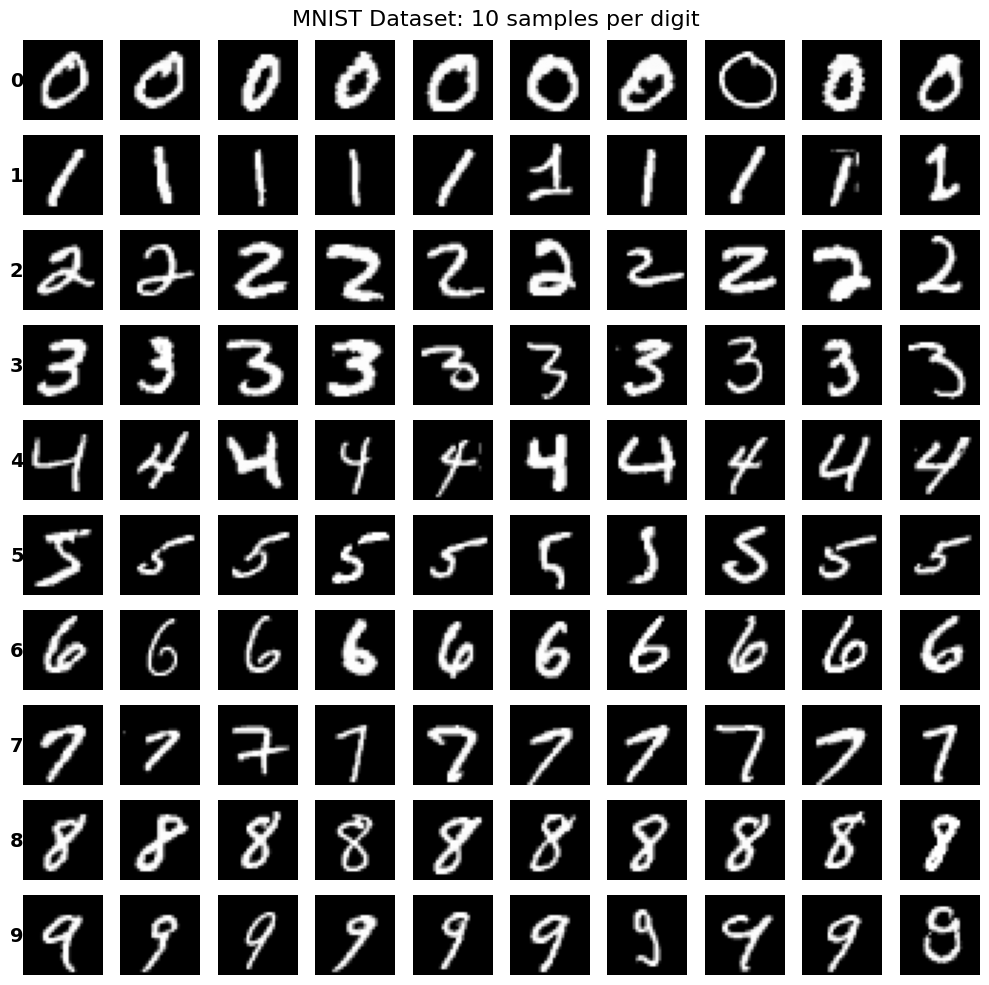

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load the Data
# MNIST is built-in. x is the image, y is the label (0-9).
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# --- VISUALIZATION: The MNIST Grid ---
# We will display 10 rows (digits 0-9) and 10 columns (different writing styles)

num_classes = 10
samples_per_class = 10

# Create a figure with 10x10 sub-plots
fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(10, 10))
fig.suptitle("MNIST Dataset: 10 samples per digit", fontsize=16)

for label in range(num_classes):
    # Find the indices of all images that correspond to the current digit (label)
    # np.where returns a tuple, so we take the first element [0]
    indices = np.where(y_train == label)[0]

    # Pick the first 10 examples of this digit
    selected_indices = indices[:samples_per_class]

    for i, idx in enumerate(selected_indices):
        ax = axes[label, i]

        # We use .reshape(28, 28) to ensure the image is 2D (removing the channel dim if present)
        ax.imshow(x_train[idx].reshape(28, 28), cmap='gray')

        # Clean up the look: remove axis ticks
        ax.axis('off')

        # Add a label only to the first column to identify the row
        if i == 0:
            ax.text(-5, 14, str(label), fontsize=14, fontweight='bold', va='center')

plt.tight_layout()
plt.subplots_adjust(top=0.95) # Make room for the title
plt.show()



In [ ]:
# Normalize Pixel Values (0-255 -> 0.0-1.0)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for the CNN
# We need to add the 'Channel' dimension.
# Shape becomes (60000, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"Training data shape: {x_train.shape}")
print(f"Number of classes: {len(np.unique(y_train))} (Digits 0-9)")

# Visualize one sample
#plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
#plt.title(f"Label: {y_train[0]}")
#plt.axis('off')
#plt.show()

Training data shape: (60000, 28, 28, 1)
Number of classes: 10 (Digits 0-9)


In [ ]:
# --- PARAMETERS TO PLAY WITH ---
num_filters = 32      # Number of "feature detectors" (kernels) to learn
kernel_size = (3, 3)  # Size of the sliding window (3x3 is standard)
pool_size = (2, 2)    # How much to shrink the image (2x2 cuts size in half)
# -------------------------------

model = keras.Sequential([
    # --- BLOCK 1: Feature Extraction using convolution ---
    # Input shape must be defined in the first layer
    layers.Input(shape=(28, 28, 1)),

    # Conv2D: Learns 32 different filters.
    # Activation='relu' turns negative values to 0 (adds non-linearity).
    layers.Conv2D(num_filters, kernel_size, activation="relu"),

    # MaxPooling: Shrinks the output (28x28 -> 14x14)
    layers.MaxPooling2D(pool_size=pool_size),

    # --- BLOCK 2: Classification ---
    # Flatten: Unrolls the 3D block into a long 1D vector
    layers.Flatten(),

    # Output Layer: 10 neurons (one for each digit 0-9)
    # Softmax: Ensures the output sums to 1 (Probabilities)
    layers.Dense(10, activation="softmax")
])

# Print the architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9855 - val_loss: 0.0685
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9996 - loss: 0.0033 - val_accuracy: 0.9860 - val_loss: 0.0702
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9840 - val_loss: 0.0740
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9857 - val_loss: 0.0677
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9855 - val_loss: 0.0699
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9997 - loss: 0.0023 - val_accuracy: 0.9848 - val_loss: 0.0742
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9862 - val_loss: 0.0750
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9999 - loss: 0.0015 - 

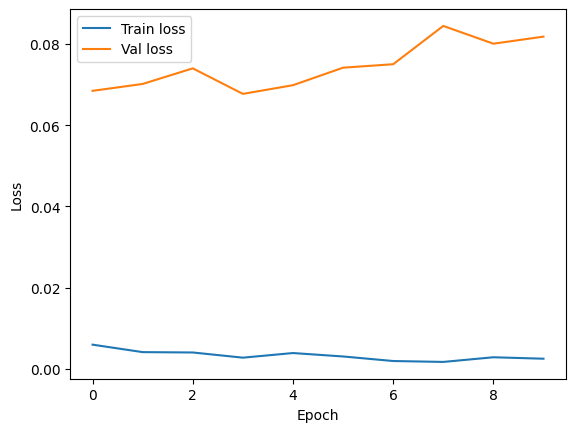

In [ ]:
# --- PARAMETERS TO PLAY WITH ---
batch_size = 64
epochs = 10
# -------------------------------

# 1. Compile
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# 2. Train
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

print("Training finished.")

# 3. Plot training curves
plt.figure()
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plt.figure()
#plt.plot(history.history["accuracy"], label="Train accuracy")
#plt.plot(history.history["val_accuracy"], label="Val accuracy")
#plt.xlabel("Epoch")
#plt.ylabel("Accuracy")
#plt.legend()
#plt.show()


Test accuracy: 98.28%


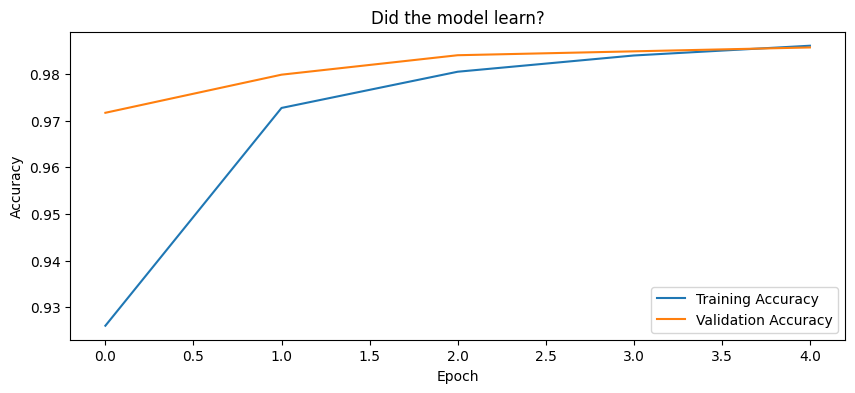

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


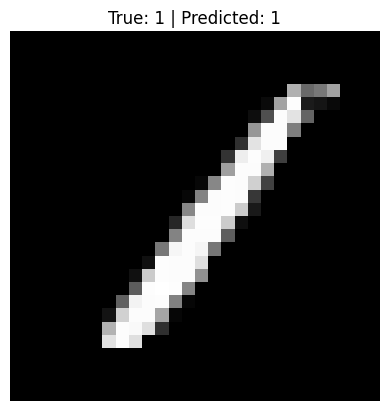

In [ ]:
# 1. Evaluate on Test Data
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {score[1]*100:.2f}%")

# 2. Visualize the Learning Curve
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Did the model learn?')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. See a Prediction
# Let's pick a random image from the test set
idx = np.random.randint(0, len(x_test))
sample_image = x_test[idx]
true_label = y_test[idx]

# Predict (Add batch dimension because model expects a list of images)
prediction_probs = model.predict(np.expand_dims(sample_image, 0))
predicted_label = np.argmax(prediction_probs)

plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True: {true_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()